In [1]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag


import nltk
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import model_selection, naive_bayes
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import wordnet

In [2]:
data = pd.read_csv('amazon-reviews.csv', encoding="latin-1")

In [3]:
data.head()

,text,label
0,Stuning even for the non-gamer: This sound tr...,__label__2
1,The best soundtrack ever to anything.: I'm re...,__label__2
2,Amazing!: This soundtrack is my favorite musi...,__label__2
3,Excellent Soundtrack: I truly like this sound...,__label__2
4,"Remember, Pull Your Jaw Off The Floor After H...",__label__2


In [4]:
data.describe()

,text,label
count,10000,10000
unique,10000,2
top,Stuning even for the non-gamer: This sound tr...,__label__1
freq,1,5097


In [5]:
# Do preprocessing
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')

stopwords_list = stopwords.words('english')

def processing(df):
    # remove non alphanumeric
    df['review_cleaned'] = df.text.str.replace('[^a-zA-Z0-9 ]', '')
    # lowercase
    df.review_cleaned = df.review_cleaned.str.lower()
    # split into list
    df.review_cleaned = df.review_cleaned.str.split(' ')
    # remove stopwords
    df.review_cleaned = df.review_cleaned.apply(lambda x: [item for item in x if item not in stopwords_list])
    return df


# Lemmatization

def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

lemmatizer = nltk.stem.WordNetLemmatizer()
def get_lemmatize(sent):
    return " ".join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sent)])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arthu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arthu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arthu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\arthu\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\arthu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [6]:
import string

def cleanText(text):
  cleanTxt = [ char for char in text if char not in string.punctuation ]
  cleanTxt_join = ''.join(cleanTxt)
  cleanTxt_join_clean = [word for word in cleanTxt_join.split() if word.lower() not in stopwords.words('english') ]
  return cleanTxt_join_clean

In [7]:
df_clean = data['text'].apply(cleanText)

#### Tokenization

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np 
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = cleanText, dtype = np.uint8)
reviews_countvectorizer = vectorizer.fit_transform(data['text'])

In [9]:
# print(vectorizer.get_feature_names())

In [10]:
print(reviews_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [11]:
reviews_countvectorizer.shape

(10000, 48499)

In [12]:
X = pd.DataFrame(reviews_countvectorizer.toarray())
X

,0,1,2,3,4,5,6,7,8,9,...,48489,48490,48491,48492,48493,48494,48495,48496,48497,48498
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
y = data['label']
y.head()

0    __label__2 
1    __label__2 
2    __label__2 
3    __label__2 
4    __label__2 
Name: label, dtype: object

In [14]:
X.shape

(10000, 48499)

In [15]:
y.shape

(10000,)

In [16]:
# Train a NaiveBase Classifier

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [18]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

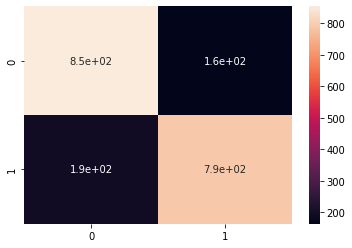

In [20]:
# Predicting the Test set results
import seaborn as sns
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [21]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

 __label__1        0.82      0.84      0.83      1017
 __label__2        0.83      0.80      0.82       983

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000



In [22]:
print(accuracy_score(y_test, y_predict_test))

0.822
